<a href="https://colab.research.google.com/github/noo-nine/Machine-Learning/blob/main/Classification_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


In [3]:
heart = pd.read_csv('heart_disease_uci.csv')
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# dropping unnecessary columns
heart.drop(columns = ['id', 'dataset'], inplace = True)
heart.shape

(920, 14)

In [5]:
heart.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']

In [6]:
heart.duplicated().sum()

2

In [7]:
heart.drop_duplicates(inplace = True)

In [8]:
heart.shape

(918, 14)

In [9]:
heart.dtypes

,0
age,int64
sex,object
cp,object
restbp,float64
chol,float64
fbs,object
restecg,object
thalach,float64
exang,object
oldpeak,float64


In [10]:
heart.isna().sum()

,0
age,0
sex,0
cp,0
restbp,59
chol,29
fbs,90
restecg,2
thalach,55
exang,55
oldpeak,62


In [11]:
cols_to_pass = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
for col in cols_to_pass:
  print(f'{col} : {heart[col].unique()}\n')

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]

sex : ['Male' 'Female']

cp : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

restbp : [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185. 116.   0.  96. 127.]

chol : [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'hd'],
      dtype='object')

In [12]:
# removing the columns with more number of nan values
heart.drop(columns =[ 'fbs', 'slope', 'ca', 'thal'], inplace = True)

In [13]:
heart.isna().sum()

,0
age,0
sex,0
cp,0
restbp,59
chol,29
restecg,2
thalach,55
exang,55
oldpeak,62
hd,0


In [14]:
import numpy as np

heart_clean = heart[ (heart['restbp'].notna()) & (heart['chol'].notna()) & (heart['thalach'].notna()) & (heart['exang'].notna()) & (heart['oldpeak'].notna()) ]

In [15]:
heart_clean.isna().sum()

,0
age,0
sex,0
cp,0
restbp,0
chol,0
restecg,2
thalach,0
exang,0
oldpeak,0
hd,0


In [ ]:
heart_clean.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'hd'],
      dtype='object')

In [ ]:
cols_to_pass = ['age', 'sex', 'cp', 'restbp', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'hd']
for col in cols_to_pass:
  print(f'{col} : {heart_clean[col].unique()}\n')

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]

sex : ['Male' 'Female']

cp : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

restbp : [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190. 113.  92.  95.  80.
 185. 116.   0.  96. 127.]

chol : [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303

In [16]:
# we have nan value only in restecg
heart_clean = heart_clean[ heart_clean['restecg'].notna()]

In [17]:
heart_clean.shape

(824, 10)

Formatting The Data

In [18]:
x = heart_clean.drop(columns = ['hd']).copy()
x.head()

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak
0,63,Male,typical angina,145.0,233.0,lv hypertrophy,150.0,False,2.3
1,67,Male,asymptomatic,160.0,286.0,lv hypertrophy,108.0,True,1.5
2,67,Male,asymptomatic,120.0,229.0,lv hypertrophy,129.0,True,2.6
3,37,Male,non-anginal,130.0,250.0,normal,187.0,False,3.5
4,41,Female,atypical angina,130.0,204.0,lv hypertrophy,172.0,False,1.4


In [19]:
y = heart_clean['hd'].copy()
y.head()

,hd
0,0
1,2
2,1
3,0
4,0


In [20]:
pd.get_dummies(x, columns = ['sex', 'cp', 'restecg'], dtype = int).head()

,age,restbp,chol,thalach,exang,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,63,145.0,233.0,150.0,False,2.3,0,1,0,0,0,1,1,0,0
1,67,160.0,286.0,108.0,True,1.5,0,1,1,0,0,0,1,0,0
2,67,120.0,229.0,129.0,True,2.6,0,1,1,0,0,0,1,0,0
3,37,130.0,250.0,187.0,False,3.5,0,1,0,0,1,0,0,1,0
4,41,130.0,204.0,172.0,False,1.4,1,0,0,1,0,0,1,0,0


In [21]:
heart_encoded = pd.get_dummies(x, columns = ['sex', 'cp', 'restecg'], dtype = int)

In [22]:
y.unique()

array([0, 2, 1, 3, 4])

In [23]:
# we care only about 0 and 1 values
y_not_zero = y > 0
y[y_not_zero] = 1
y.unique()

array([0, 1])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(heart_encoded, y,  test_size = 0.25, random_state = 49 )

In [47]:
# building descision tree
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state = 37)
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=37)

[Text(0.4727954664570231, 0.9722222222222222, 'cp_asymptomatic <= 0.5\ngini = 0.496\nsamples = 618\nvalue = [282, 336]\nclass = Yes HD'),
 Text(0.19876834381551362, 0.9166666666666666, 'chol <= 50.0\ngini = 0.393\nsamples = 279\nvalue = [204, 75]\nclass = No HD'),
 Text(0.3357819051362684, 0.9444444444444444, 'True  '),
 Text(0.07127882599580712, 0.8611111111111112, 'age <= 62.5\ngini = 0.278\nsamples = 30\nvalue = [5, 25]\nclass = Yes HD'),
 Text(0.041928721174004195, 0.8055555555555556, 'restbp <= 175.0\ngini = 0.159\nsamples = 23\nvalue = [2, 21]\nclass = Yes HD'),
 Text(0.025157232704402517, 0.75, 'age <= 46.0\ngini = 0.091\nsamples = 21\nvalue = [1, 20]\nclass = Yes HD'),
 Text(0.016771488469601678, 0.6944444444444444, 'age <= 41.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes HD'),
 Text(0.008385744234800839, 0.6388888888888888, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes HD'),
 Text(0.025157232704402517, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [

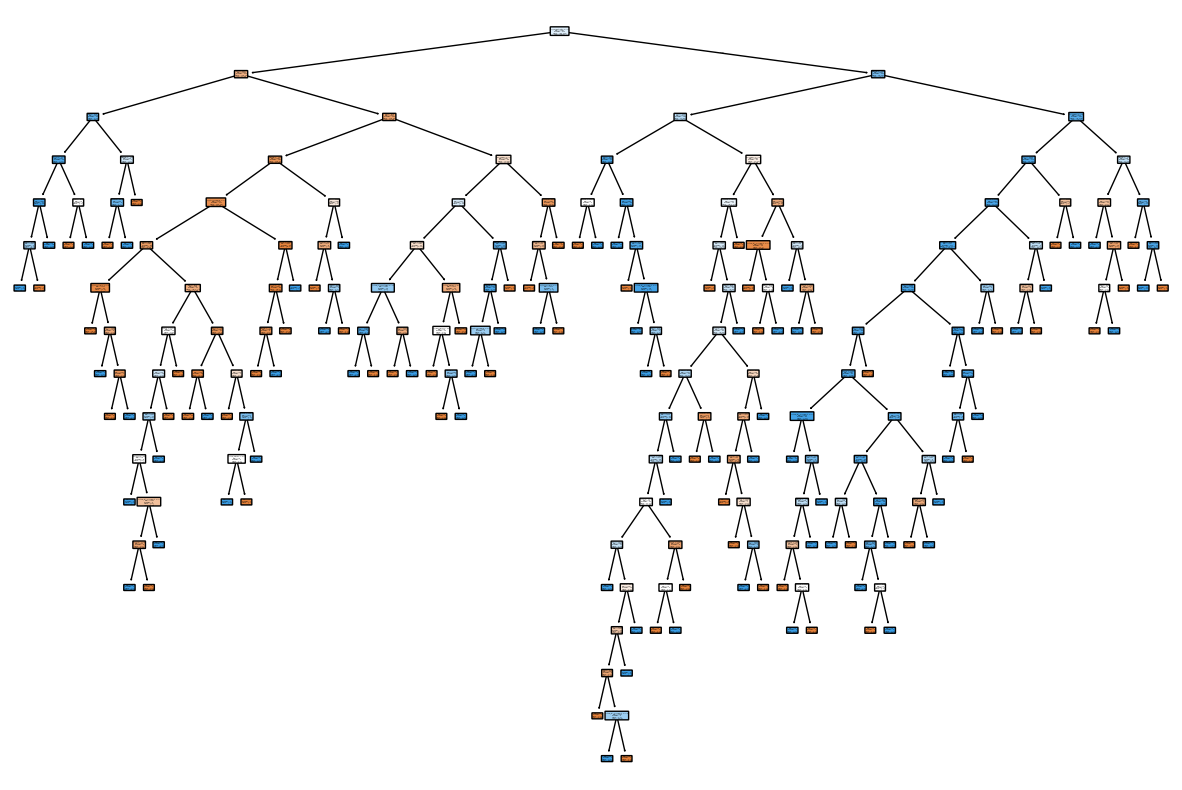

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ['No HD', 'Yes HD'], feature_names = heart_encoded.columns)

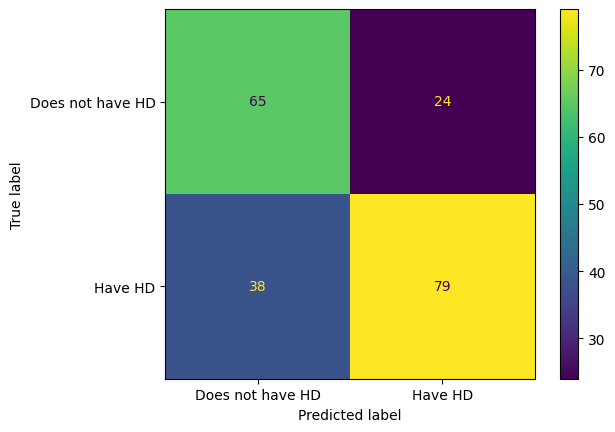

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_dt, x_test, y_test, display_labels = ['Does not have HD', 'Have HD'])

# Cost Complexity **Pruning**

Involves finfing alpha- pruning paramaeter - controls how little the tree is, or much pruning has to be done

In [27]:
path = clf_dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[ : -1]

In [28]:
clf_dts = []
for alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 92, ccp_alpha = alpha)
  clf_dt.fit(x_train, y_train)
  clf_dts.append(clf_dt)

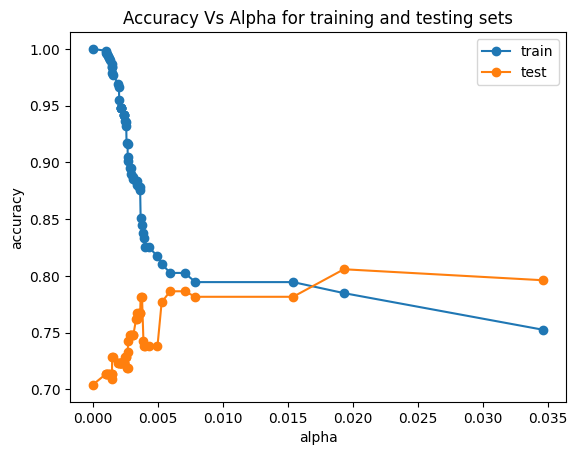

In [29]:
train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy Vs Alpha for training and testing sets')
line1 = ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train')
line2 = ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test')
#line1.set_drawstyle('steps-post')
#line2.set_drawstyle('steps-post')
ax.legend()
plt.show()

In [ ]:
# we will set alpha value to 0.016 by looking at the graph

Cross Validation

<Axes: xlabel='tree'>

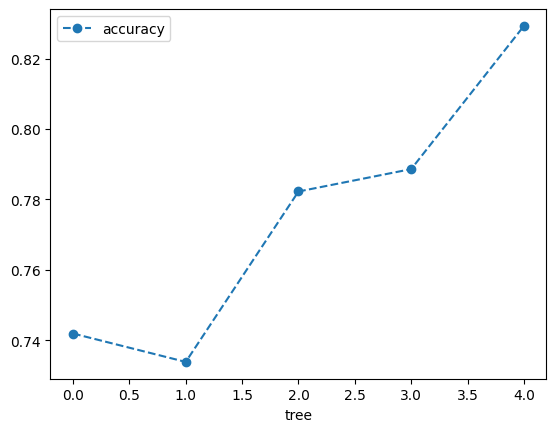

In [31]:
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state = 19, ccp_alpha = 0.016)
# now we do 5_fold cross validation
scores = cross_val_score(clf_dt, x_train, y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})
df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

In [ ]:
# alpha value isi sensitive to different sets of data
# instead of finding a single train and test data
# we are using cross validation to look for optimal value for alpha

In [32]:
alpha_loop_values = []
for alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 36, ccp_alpha = alpha)
  scores = cross_val_score(clf_dt, x_train, y_train, cv = 5)
  alpha_loop_values.append([ alpha, np.mean(scores), np.std(scores)])

<Axes: xlabel='alpha'>

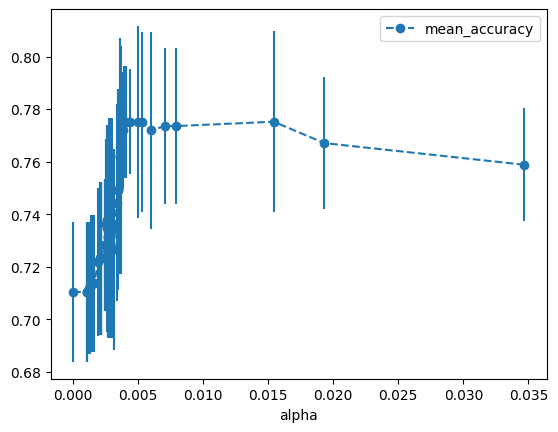

In [33]:
# drawing graph for mean and std of scores
# for each alpha value
alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot( x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

In [34]:
# we need to find the exact value of alpha
alpha_results.sort_values(by = 'mean_accuracy')

,alpha,mean_accuracy,std
0,0.000000,0.710372,0.026627
1,0.001040,0.710372,0.026627
2,0.001064,0.710372,0.026627
3,0.001079,0.710372,0.026627
4,0.001214,0.711998,0.025106
5,0.001294,0.711998,0.025106
6,0.001357,0.713611,0.026178
7,0.001477,0.713611,0.026178
8,0.001494,0.713611,0.026178
9,0.001494,0.713611,0.026178


In [38]:
# alpha = 0.015417 has the highest mean_accuracy
ideal_alpha  = alpha_results.loc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_alpha

0.015417315549032473

Building Decision Tree

In [40]:
clf_pruned = DecisionTreeClassifier( random_state = 11, ccp_alpha = ideal_alpha)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015417315549032473, random_state=11)

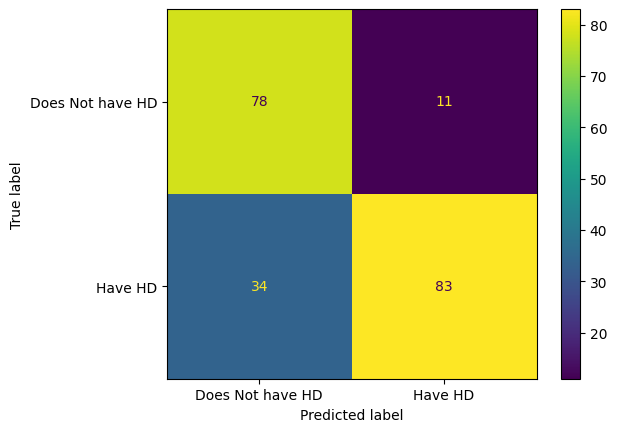

In [42]:
ConfusionMatrixDisplay.from_estimator(clf_pruned, x_test, y_test, display_labels = ['Does Not have HD', 'Have HD'])

In [ ]:
# pruned tree does perform better thsn original tree

[Text(0.5, 0.875, 'cp_asymptomatic <= 0.5\ngini = 0.496\nsamples = 618\nvalue = [282, 336]\nclass = Yes HD'),
 Text(0.25, 0.625, 'chol <= 50.0\ngini = 0.393\nsamples = 279\nvalue = [204, 75]\nclass = No HD'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.278\nsamples = 30\nvalue = [5, 25]\nclass = Yes HD'),
 Text(0.375, 0.375, 'gini = 0.321\nsamples = 249\nvalue = [199, 50]\nclass = No HD'),
 Text(0.75, 0.625, 'oldpeak <= 0.65\ngini = 0.354\nsamples = 339\nvalue = [78, 261]\nclass = Yes HD'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'chol <= 42.5\ngini = 0.476\nsamples = 136\nvalue = [53, 83]\nclass = Yes HD'),
 Text(0.5, 0.125, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = Yes HD'),
 Text(0.75, 0.125, 'gini = 0.498\nsamples = 94\nvalue = [50, 44]\nclass = No HD'),
 Text(0.875, 0.375, 'gini = 0.216\nsamples = 203\nvalue = [25, 178]\nclass = Yes HD')]

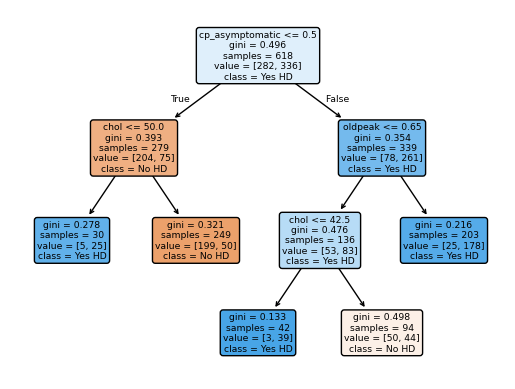

In [45]:
from sklearn.tree import plot_tree
plot_tree(clf_pruned, filled = True, rounded = True, class_names = ['No HD', 'Yes HD'], feature_names = heart_encoded.columns)